## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢

2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 8s 160us/step - loss: 2.2513 - accuracy: 0.1680 - val_loss: 2.1997 - val_accuracy: 0.2179
Epoch 2/500
50000/50000 [==============================] - 7s 146us/step - loss: 2.1641 - accuracy: 0.2415 - val_loss: 2.1311 - val_accuracy: 0.2494
Epoch 3/500
50000/50000 [==============================] - 7s 144us/step - loss: 2.1057 - accuracy: 0.2653 - val_loss: 2.0802 - val_accuracy: 0.2720
Epoch 4/500
50000/50000 [==============================] - 7s 143us/step - loss: 2.0604 - accuracy: 0.2785 - val_loss: 2.0401 - val_accuracy: 0.2858
Epoch 5/500
50000/50000 [==============================] - 7s 145us/step - loss: 2.0238 - accuracy: 0.2921 - val_loss: 2.0080 - val_accuracy: 0.3001
Epoch 6/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.9940 - accuracy: 0.3018 - val_loss: 1.9802 - val_accuracy: 0.3048
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 7s 131us/step - loss: 1.6572 - accuracy: 0.4226 - val_loss: 1.6615 - val_accuracy: 0.4198
Epoch 56/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6544 - accuracy: 0.4232 - val_loss: 1.6572 - val_accuracy: 0.4231
Epoch 57/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6511 - accuracy: 0.4247 - val_loss: 1.6548 - val_accuracy: 0.4237
Epoch 58/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6482 - accuracy: 0.4250 - val_loss: 1.6542 - val_accuracy: 0.4204
Epoch 59/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6454 - accuracy: 0.4266 - val_loss: 1.6542 - val_accuracy: 0.4224
Epoch 60/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.6426 - accuracy: 0.4278 - val_loss: 1.6469 - val_accuracy: 0.4273
Epoch 61/500
50000/50000 [==============================] - 7s 130us/step - loss: 1.6397 - accuracy: 0.4291 - val

50000/50000 [==============================] - 6s 128us/step - loss: 1.5322 - accuracy: 0.4647 - val_loss: 1.5536 - val_accuracy: 0.4573
Epoch 110/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.5305 - accuracy: 0.4660 - val_loss: 1.5489 - val_accuracy: 0.4591
Epoch 111/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.5287 - accuracy: 0.4655 - val_loss: 1.5547 - val_accuracy: 0.4562
Epoch 112/500
50000/50000 [==============================] - 6s 129us/step - loss: 1.5266 - accuracy: 0.4670 - val_loss: 1.5484 - val_accuracy: 0.4560
Epoch 113/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.5250 - accuracy: 0.4664 - val_loss: 1.5470 - val_accuracy: 0.4580
Epoch 114/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.5231 - accuracy: 0.4673 - val_loss: 1.5432 - val_accuracy: 0.4603
Epoch 115/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.5214 - accuracy: 0.4686

50000/50000 [==============================] - 7s 138us/step - loss: 1.4426 - accuracy: 0.4946 - val_loss: 1.4858 - val_accuracy: 0.4768
Epoch 164/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.4413 - accuracy: 0.4950 - val_loss: 1.4821 - val_accuracy: 0.4779
Epoch 165/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.4396 - accuracy: 0.4961 - val_loss: 1.4821 - val_accuracy: 0.4776
Epoch 166/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.4382 - accuracy: 0.4970 - val_loss: 1.4867 - val_accuracy: 0.4763
Epoch 167/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.4368 - accuracy: 0.4978 - val_loss: 1.4851 - val_accuracy: 0.4766
Epoch 168/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.4351 - accuracy: 0.5003 - val_loss: 1.4807 - val_accuracy: 0.4805
Epoch 169/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.4337 - accuracy: 0.4980

50000/50000 [==============================] - 7s 150us/step - loss: 1.3657 - accuracy: 0.5239 - val_loss: 1.4390 - val_accuracy: 0.4859
Epoch 218/500
50000/50000 [==============================] - 7s 136us/step - loss: 1.3643 - accuracy: 0.5239 - val_loss: 1.4364 - val_accuracy: 0.4875
Epoch 219/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.3632 - accuracy: 0.5252 - val_loss: 1.4332 - val_accuracy: 0.4895
Epoch 220/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.3620 - accuracy: 0.5230 - val_loss: 1.4318 - val_accuracy: 0.4890
Epoch 221/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.3605 - accuracy: 0.5241 - val_loss: 1.4408 - val_accuracy: 0.4834
Epoch 222/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.3596 - accuracy: 0.5246 - val_loss: 1.4411 - val_accuracy: 0.4865
Epoch 223/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.3579 - accuracy: 0.5257

50000/50000 [==============================] - 7s 133us/step - loss: 1.2981 - accuracy: 0.5471 - val_loss: 1.4268 - val_accuracy: 0.4878
Epoch 272/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.2971 - accuracy: 0.5469 - val_loss: 1.3989 - val_accuracy: 0.5008
Epoch 273/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.2955 - accuracy: 0.5485 - val_loss: 1.3991 - val_accuracy: 0.5017
Epoch 274/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2952 - accuracy: 0.5498 - val_loss: 1.3943 - val_accuracy: 0.5030
Epoch 275/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.2937 - accuracy: 0.5496 - val_loss: 1.3998 - val_accuracy: 0.5019
Epoch 276/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2922 - accuracy: 0.5502 - val_loss: 1.3986 - val_accuracy: 0.4984
Epoch 277/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.2909 - accuracy: 0.5489

50000/50000 [==============================] - 7s 132us/step - loss: 1.2372 - accuracy: 0.5689 - val_loss: 1.3746 - val_accuracy: 0.5105
Epoch 326/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.2365 - accuracy: 0.5686 - val_loss: 1.3859 - val_accuracy: 0.5012
Epoch 327/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.2351 - accuracy: 0.5697 - val_loss: 1.3756 - val_accuracy: 0.5048
Epoch 328/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.2344 - accuracy: 0.5711 - val_loss: 1.3667 - val_accuracy: 0.5143
Epoch 329/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.2324 - accuracy: 0.5712 - val_loss: 1.3722 - val_accuracy: 0.5092
Epoch 330/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.2326 - accuracy: 0.5713 - val_loss: 1.3777 - val_accuracy: 0.5085
Epoch 331/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.2304 - accuracy: 0.5725

50000/50000 [==============================] - 7s 133us/step - loss: 1.1804 - accuracy: 0.5898 - val_loss: 1.3671 - val_accuracy: 0.5152
Epoch 380/500
50000/50000 [==============================] - 7s 138us/step - loss: 1.1792 - accuracy: 0.5904 - val_loss: 1.3936 - val_accuracy: 0.5033
Epoch 381/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1784 - accuracy: 0.5903 - val_loss: 1.3466 - val_accuracy: 0.5206
Epoch 382/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.1773 - accuracy: 0.5896 - val_loss: 1.3527 - val_accuracy: 0.5180
Epoch 383/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.1770 - accuracy: 0.5913 - val_loss: 1.3599 - val_accuracy: 0.5193
Epoch 384/500
50000/50000 [==============================] - 7s 135us/step - loss: 1.1759 - accuracy: 0.5920 - val_loss: 1.3667 - val_accuracy: 0.5190
Epoch 385/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.1745 - accuracy: 0.5910

50000/50000 [==============================] - 7s 133us/step - loss: 1.1260 - accuracy: 0.6073 - val_loss: 1.3635 - val_accuracy: 0.5200
Epoch 434/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.1250 - accuracy: 0.6084 - val_loss: 1.3504 - val_accuracy: 0.5278
Epoch 435/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.1229 - accuracy: 0.6096 - val_loss: 1.3547 - val_accuracy: 0.5164
Epoch 436/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.1237 - accuracy: 0.6085 - val_loss: 1.3412 - val_accuracy: 0.5248
Epoch 437/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.1220 - accuracy: 0.6092 - val_loss: 1.3565 - val_accuracy: 0.5221
Epoch 438/500
50000/50000 [==============================] - 7s 137us/step - loss: 1.1211 - accuracy: 0.6098 - val_loss: 1.3560 - val_accuracy: 0.5167
Epoch 439/500
50000/50000 [==============================] - 7s 143us/step - loss: 1.1196 - accuracy: 0.6105

50000/50000 [==============================] - 6s 126us/step - loss: 1.0733 - accuracy: 0.6260 - val_loss: 1.3625 - val_accuracy: 0.5252
Epoch 488/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.0719 - accuracy: 0.6268 - val_loss: 1.3411 - val_accuracy: 0.5280
Epoch 489/500
50000/50000 [==============================] - 6s 130us/step - loss: 1.0692 - accuracy: 0.6284 - val_loss: 1.3680 - val_accuracy: 0.5196
Epoch 490/500
50000/50000 [==============================] - 7s 132us/step - loss: 1.0707 - accuracy: 0.6278 - val_loss: 1.3356 - val_accuracy: 0.5299
Epoch 491/500
50000/50000 [==============================] - 7s 134us/step - loss: 1.0680 - accuracy: 0.6293 - val_loss: 1.3311 - val_accuracy: 0.5327
Epoch 492/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.0672 - accuracy: 0.6297 - val_loss: 1.3432 - val_accuracy: 0.5276
Epoch 493/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.0687 - accuracy: 0.6292

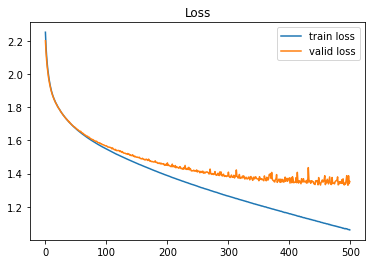

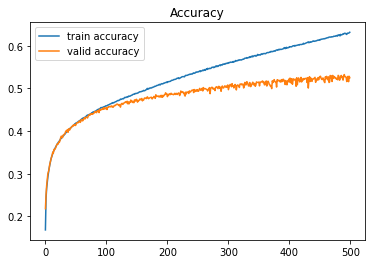

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()